## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 1. Exploratory Data Analysis </span>

In [1]:
import pandas as pd

true = pd.read_csv('../data/true_news.csv', header = 0)
true['target'] = 1
fake = pd.read_csv('../data/fake_news.csv', header = 0)
fake['target'] = 0

In [2]:
true

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [3]:
import re

def remove_location(text):
    # Remove location and parentheses
    return re.sub(r'\b(?:[A-Z]+(?:/[A-Z]+)?)\s\(Reuters\)\s-\s', '', text)

true['text'] = true['text'].apply(remove_location)

In [4]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [5]:
data = pd.concat([true, fake], axis=0)
data.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",1


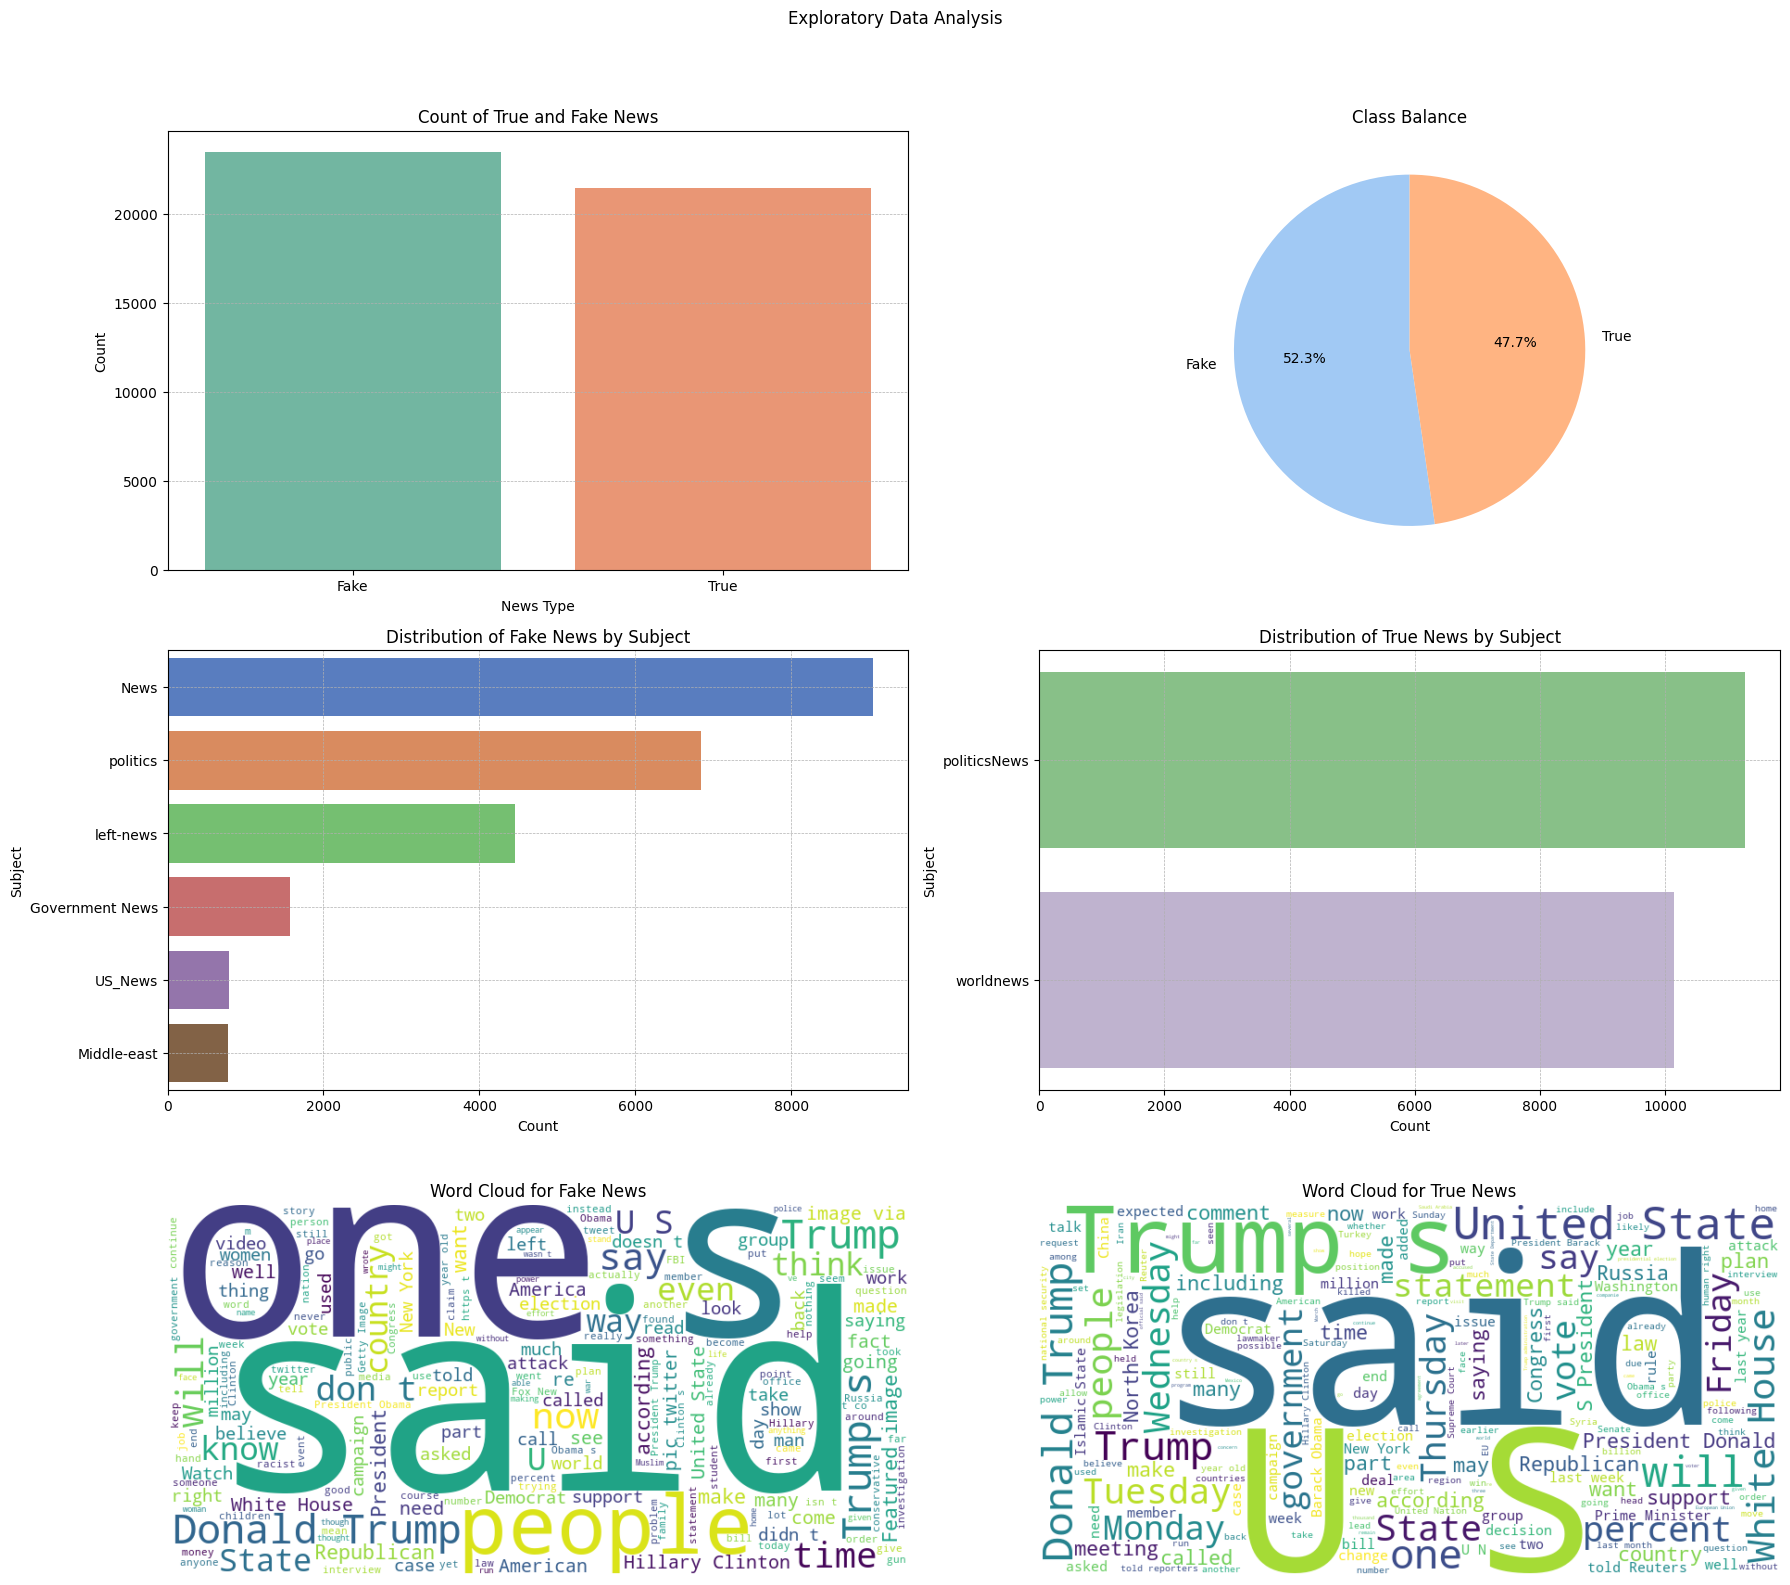

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings

warnings.filterwarnings('ignore')

fig, axes = plt.subplots(3, 2, figsize=(18, 17))
fig.suptitle('Exploratory Data Analysis')

# Number of True and Fake News
sns.countplot(data=data, x='target', palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('Count of True and Fake News')
axes[0, 0].set_xticklabels(['Fake', 'True'])
axes[0, 0].set_xlabel('News Type')
axes[0, 0].set_ylabel('Count')
axes[0, 0].grid(axis='y', linestyle='--', linewidth=0.5)

# Class Balance
class_balance = data['target'].value_counts(normalize=True)
axes[0, 1].pie(class_balance, labels=['Fake', 'True'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
axes[0, 1].set_title('Class Balance')

# Distribution of Fake News by Subject
if 'subject' in fake.columns:
    sns.countplot(data=fake, y='subject', order=fake['subject'].value_counts().index, palette='muted', ax=axes[1, 0])
    axes[1, 0].set_title('Distribution of Fake News by Subject')
    axes[1, 0].set_xlabel('Count')
    axes[1, 0].set_ylabel('Subject')
    axes[1, 0].grid(linestyle='--', linewidth=0.5)

# Distribution of True News by Subject
if 'subject' in true.columns:
    sns.countplot(data=true, y='subject', order=true['subject'].value_counts().index, palette='Accent', ax=axes[1, 1])
    axes[1, 1].set_title('Distribution of True News by Subject')
    axes[1, 1].set_xlabel('Count')
    axes[1, 1].set_ylabel('Subject')
    axes[1, 1].grid(linestyle='--', linewidth=0.5)

#  Word Cloud for Fake News
fake_text = ' '.join(fake['text'].astype(str).tolist())
fake_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
axes[2, 0].imshow(fake_wordcloud, interpolation='bilinear')
axes[2, 0].axis('off')
axes[2, 0].set_title('Word Cloud for Fake News')

# Word Cloud for True News
true_text = ' '.join(true['text'].astype(str).tolist())
true_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(true_text)
axes[2, 1].imshow(true_wordcloud, interpolation='bilinear')
axes[2, 1].axis('off')
axes[2, 1].set_title('Word Cloud for True News')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 2. Data Preprocessing </span>

### <span style="font-family: Latin Modern Roman; font-size: 23px;"> 2.1. Key Features to Use </span>

- Delete unneeded columns.

In [7]:
data.drop(columns=["title","date","subject"],inplace=True)
data.head()

,text,target
0,The head of a conservative Republican faction ...,1
1,Transgender people will be allowed for the fir...,1
2,The special counsel investigation of links bet...,1
3,Trump campaign adviser George Papadopoulos tol...,1
4,President Donald Trump called on the U.S. Post...,1


- Check for null values.

In [8]:
data.isna().sum()

text      0
target    0
dtype: int64

- Check for duplicates.

In [9]:
data.duplicated().sum()

6251

In [10]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38647 entries, 0 to 22702
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    38647 non-null  object
 1   target  38647 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 905.8+ KB


### <span style="font-family: Latin Modern Roman; font-size: 23px;"> 2.2. Text Cleaning </span>

- Remove extra whitespaces: Remove leading, trailing, and extra spaces.
- Remove Special Characters: Eliminate non-alphanumeric characters (e.g., !@#$%) as they add noise.
- Convert to Lowercase: Standardize text for better token matching.
- Remove Stopwords: Remove common words (e.g., "the", "is") that don’t add significant meaning.
- Lemmatization: Reduce words to their base form (e.g., "running" → "run").

In [12]:
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # Remove special characters
    text = re.sub(r'\W', ' ', str(text))  

    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Remove not alphabetical characters
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Lemmatization
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Removal of Stop Words
    tokens = [word for word in tokens if len(word) > 3]
    
    return tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sergiocuencanunez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sergiocuencanunez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
data['tokens'] = data['text'].apply(clean_text)

# Convert the tokens to strings for TF-IDF
data['text_cleaned'] = data['tokens'].apply(lambda x: ' '.join(x))

# List of lists of tokens for LSTM
texts_lstm = data['tokens'].tolist()

In [14]:
print(texts_lstm[:5])

[['head', 'conservative', 'republican', 'faction', 'congress', 'voted', 'month', 'huge', 'expansion', 'national', 'debt', 'called', 'fiscal', 'conservative', 'sunday', 'urged', 'budget', 'restraint', 'keeping', 'sharp', 'pivot', 'among', 'republican', 'representative', 'mark', 'meadow', 'speaking', 'face', 'nation', 'drew', 'hard', 'line', 'federal', 'spending', 'lawmaker', 'bracing', 'battle', 'january', 'return', 'holiday', 'wednesday', 'lawmaker', 'begin', 'trying', 'federal', 'budget', 'fight', 'likely', 'linked', 'issue', 'immigration', 'policy', 'even', 'november', 'congressional', 'election', 'campaign', 'approach', 'republican', 'seek', 'keep', 'control', 'congress', 'president', 'donald', 'trump', 'republican', 'want', 'budget', 'increase', 'military', 'spending', 'democrat', 'also', 'want', 'proportional', 'increase', 'defense', 'discretionary', 'spending', 'program', 'support', 'education', 'scientific', 'research', 'infrastructure', 'public', 'health', 'environmental', 'pro

### <span style="font-family: Latin Modern Roman; font-size: 23px;"> 2.3. Train-Test Split </span>

- Split the dataset into train and test sets, ensuring the split is stratified to maintain the balance of classes.

In [15]:
from sklearn.model_selection import train_test_split

# Split data for ML, LSTM and BERT
X = data['text_cleaned']
y = data['target']
X_bert = data['text_cleaned'].to_numpy()
y_bert = data['target'].to_numpy().astype('float32').reshape(-1,1)

# Split for ML models
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(
    X, y, test_size = 0.2, stratify = y, random_state = 42
)

# Split for LSTM model
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(
    texts_lstm, y, test_size = 0.2, stratify = y, random_state = 42
)

# Split for BERT model
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(
    X_bert, y_bert, test_size = 0.2, stratify = y_bert, random_state = 42
)
X_train_bert, X_valid_bert, y_train_bert, y_valid_bert = train_test_split(
    X_train_bert, y_train_bert, test_size = 0.2, stratify = y_train_bert, random_state = 42
)

### <span style="font-family: Latin Modern Roman; font-size: 23px;"> 2.4. TF-IDF Vectorization & Tokenization</span>

- Use TF-IDF to convert the cleaned content into numerical vectors for ML models.

In [16]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# TF-IDF Vectorization for ML models
vectorizer = TfidfVectorizer(max_features = 5000) # Limit the number of features to 5000 for faster training
X_train_ml = vectorizer.fit_transform(X_train_ml)
X_test_ml = vectorizer.transform(X_test_ml)

# Save the TF-IDF vectorizer
with open("../preprocessing_artifacts/tfidf_vectorizer.pkl", "wb") as file:
    pickle.dump(vectorizer, file)

# Tokenization and Padding for LSTM
lstm_tokenizer = Tokenizer()
lstm_tokenizer.fit_on_texts(X_train_dl)
word_idx = lstm_tokenizer.word_index
X_toke_train = lstm_tokenizer.texts_to_sequences(X_train_dl)
X_toke_test = lstm_tokenizer.texts_to_sequences(X_test_dl)

# Save the LSTM tokenizer
with open("../preprocessing_artifacts/lstm_tokenizer.pkl", "wb") as file:
    pickle.dump(lstm_tokenizer, file)
    
max_sequence_length = 150  # Define max sequence length for padding
size = len(word_idx) # Define the vocabulary size
X_train_dl = pad_sequences(X_toke_train, maxlen = max_sequence_length)
X_test_dl = pad_sequences(X_toke_test, maxlen = max_sequence_length)

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 3. Decision Tree Classifier - CART </span>

In [17]:
from sklearn.tree import DecisionTreeClassifier

# Creating the model with decision tree
cart_model = DecisionTreeClassifier(
            max_depth = 10,
            criterion = 'gini',
            class_weight = 'balanced',
            random_state = 42
          )

# Fit the model
cart_model.fit(X_train_ml, y_train_ml)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)

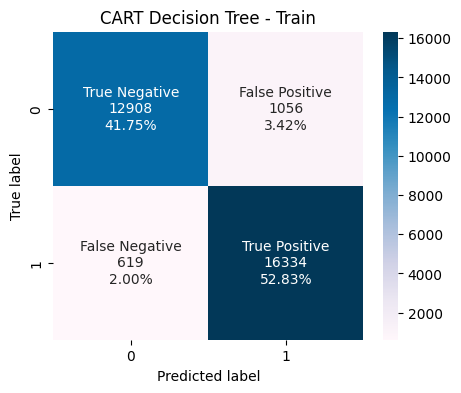

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_train_ml, cart_model.predict(X_train_ml), labels = cart_model.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('CART Decision Tree - Train', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

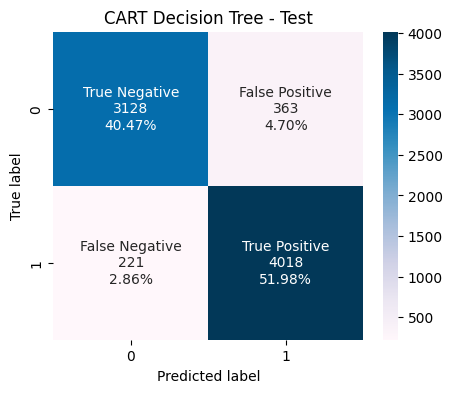

In [19]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_ml, cart_model.predict(X_test_ml), labels = cart_model.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('CART Decision Tree - Test', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

### <span style="font-family: Latin Modern Roman; font-size: 23px;"> 3.1. Pruning Analysis</span>

In [20]:
from sklearn.model_selection import GridSearchCV

#  Alternative method using GridSearchCV to fine tune method parameters
param_grid = {
    'max_depth':[5, 8, 10, 15],
    'min_samples_split':[10, 30, 50, 60, 70],
    'min_impurity_decrease': [0.0001, 0.0005, 0.001, 0.005, 0.01]
}

gridSearch = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid, cv = 10, n_jobs = 1)
gridSearch.fit(X_train_ml, y_train_ml)

print('Initial Score: ', gridSearch.best_score_)
print('Initial Parameters: ', gridSearch.best_params_)

Initial Score:  0.9334667626205195
Initial Parameters:  {'max_depth': 15, 'min_impurity_decrease': 0.0001, 'min_samples_split': 30}


In [21]:
# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': [10, 12, 15, 18],
    'min_samples_split': [20, 25, 30, 35],
    'min_impurity_decrease': [0.00005, 0.00008, 0.0001, 0.0003, 0.0005],
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid, cv = 10, n_jobs = -1)
gridSearch.fit(X_train_ml, y_train_ml)

print('Improved Score: ', gridSearch.best_score_)
print('Improved Parameters: ', gridSearch.best_params_)
bestClassTree = gridSearch.best_estimator_

Improved Score:  0.9339197218649644
Improved Parameters:  {'max_depth': 18, 'min_impurity_decrease': 8e-05, 'min_samples_split': 20}


In [22]:
# Fit the pruned tree with improved parameters
pruned_tree = DecisionTreeClassifier(random_state = 42, max_depth = 18, min_impurity_decrease = 8e-05, min_samples_split = 20, class_weight = 'balanced')
pruned_tree.fit(X_train_ml, y_train_ml)

DecisionTreeClassifier(class_weight='balanced', max_depth=18,
                       min_impurity_decrease=8e-05, min_samples_split=20,
                       random_state=42)

In [23]:
# Save the model with pickle
with open('../models/dt_pruned_model.pkl', 'wb') as file:
    pickle.dump(pruned_tree, file)

print("Model saved successfully with pickle!")

Model saved successfully with pickle!


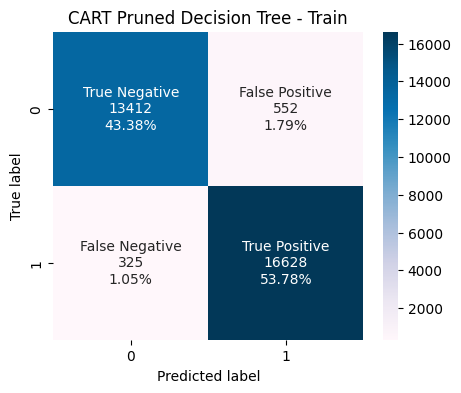

In [24]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train_ml, pruned_tree.predict(X_train_ml), labels = pruned_tree.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('CART Pruned Decision Tree - Train', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

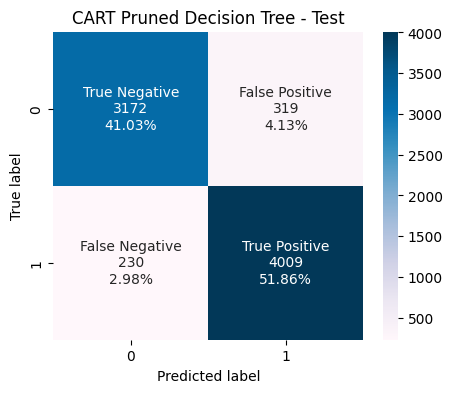

In [25]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_ml, pruned_tree.predict(X_test_ml), labels = pruned_tree.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('CART Pruned Decision Tree - Test', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

### <span style="font-family: Latin Modern Roman; font-size: 23px;"> 3.2. Classification Report </span>

In [26]:
from sklearn.metrics import classification_report
print(
    classification_report(
        y_true = y_test_ml,
        y_pred = pruned_tree.predict(X_test_ml)
    )
)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3491
           1       0.93      0.95      0.94      4239

    accuracy                           0.93      7730
   macro avg       0.93      0.93      0.93      7730
weighted avg       0.93      0.93      0.93      7730



---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 4. Random Forest </span>

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid

param_grid = ParameterGrid(
                {'n_estimators': [20, 25, 50, 100, 150],
                'max_features': [5, 10, 15, 20, 25],
                'max_depth'   : [1, 5, 10, 15, 20],
                'criterion'   : ['gini', 'entropy']
                }
            )

results = {'params': [], 'oob_accuracy': []}

for params in param_grid:
    
    model = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                class_weight = 'balanced',
                random_state = 42,
                ** params
             )
    
    model.fit(X_train_ml, y_train_ml)
    
    results['params'].append(params)
    results['oob_accuracy'].append(model.oob_score_)

# Results
results = pd.DataFrame(results)
results = pd.concat([results, results['params'].apply(pd.Series)], axis=1)
results = results.sort_values('oob_accuracy', ascending=False)
results = results.drop(columns = 'params')
results.head(10)

,oob_accuracy,criterion,max_depth,max_features,n_estimators
124,0.950480,gini,20,25,150
249,0.950351,entropy,20,25,150
248,0.947925,entropy,20,25,100
119,0.947569,gini,20,20,150
244,0.947181,entropy,20,20,150
123,0.946793,gini,20,25,100
243,0.942071,entropy,20,20,100
118,0.941391,gini,20,20,100
99,0.940971,gini,15,25,150
224,0.940615,entropy,15,25,150


In [28]:
# Better hyperparameters using out-of-bag error
print("---------------------------------------------------------------------")
print("Better Hyperparameters Found - Random Forest (OOB - Accuracy)")
print("---------------------------------------------------------------------")
print(results.iloc[0,0], ":", results.iloc[0,:]['oob_accuracy'], "accuracy")

---------------------------------------------------------------------
Better Hyperparameters Found - Random Forest (OOB - Accuracy)
---------------------------------------------------------------------
0.9504803182715011 : 0.9504803182715011 accuracy


In [29]:
# Model creation
rf_best_oob = RandomForestClassifier(
            n_estimators = 150,  # number of trees
            criterion    = 'gini',
            max_depth    = 20,
            max_features = 25,
            oob_score    = True,
            n_jobs       = -1,
            class_weight = 'balanced',
            random_state = 42
         )

# Training Random Forest
rf_best_oob.fit(X_train_ml, y_train_ml)

RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=25,
                       n_estimators=150, n_jobs=-1, oob_score=True,
                       random_state=42)

In [30]:
# Save the model with pickle
with open('../models/rf_oob_model.pkl', 'wb') as file:
    pickle.dump(rf_best_oob, file)

print("Model saved successfully with pickle!")

Model saved successfully with pickle!


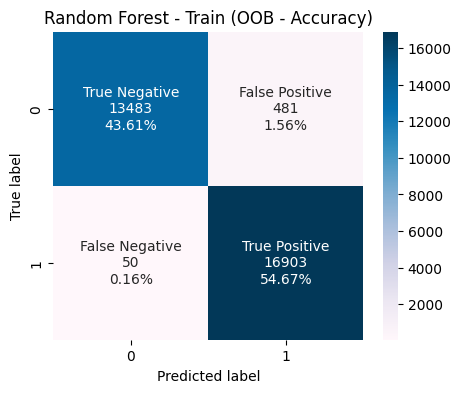

In [31]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train_ml, rf_best_oob.predict(X_train_ml), labels=rf_best_oob.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('Random Forest - Train (OOB - Accuracy)', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

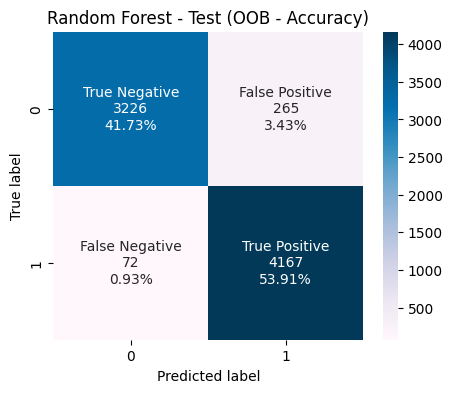

In [32]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_ml, rf_best_oob.predict(X_test_ml), labels=rf_best_oob.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('Random Forest - Test (OOB - Accuracy)', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

In [33]:
from sklearn.model_selection import RepeatedKFold

# Grid search based on cross-validation
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [20, 25, 50, 100, 150],
              'max_features': [5, 10, 15, 20, 25],
              'max_depth'   : [1, 5, 10, 15, 20],
              'criterion'   : ['gini', 'entropy']
             }

# Grid search by CV
grid = GridSearchCV(
        estimator  = RandomForestClassifier(random_state = 42, class_weight = 'balanced'),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 42), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train_ml, y = y_train_ml)

# Resultados
results_cv = pd.DataFrame(grid.cv_results_)
results_cv.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
124,gini,20,25,150,0.953079,0.002418,0.983617,0.000617
249,entropy,20,25,150,0.952626,0.002645,0.982906,0.000693
248,entropy,20,25,100,0.952389,0.002068,0.981971,0.000914
123,gini,20,25,100,0.952378,0.002124,0.982545,0.000782


In [34]:
# Better hyperparameters using cv and out-of-bag error
print("---------------------------------------------------------------------")
print("Better Hyperparameters Found - Random Forest (Cross - Validation)")
print("---------------------------------------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

---------------------------------------------------------------------
Better Hyperparameters Found - Random Forest (Cross - Validation)
---------------------------------------------------------------------
{'criterion': 'gini', 'max_depth': 20, 'max_features': 25, 'n_estimators': 150} : 0.9530787271111648 accuracy


In [35]:
# Model creation
rf_cv = RandomForestClassifier(
            n_estimators = 150,  # number of trees
            criterion    = 'gini',
            max_depth    = 20,
            max_features = 25,
            oob_score    = True,
            n_jobs       = -1,
            class_weight = 'balanced',
            random_state = 42
         )

# Training Random Forest
rf_cv.fit(X_train_ml, y_train_ml)

RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=25,
                       n_estimators=150, n_jobs=-1, oob_score=True,
                       random_state=42)

In [36]:
# Save the model with pickle
with open('../models/rf_cv_model.pkl', 'wb') as file:
    pickle.dump(rf_cv, file)

print("Model saved successfully with pickle!")

Model saved successfully with pickle!


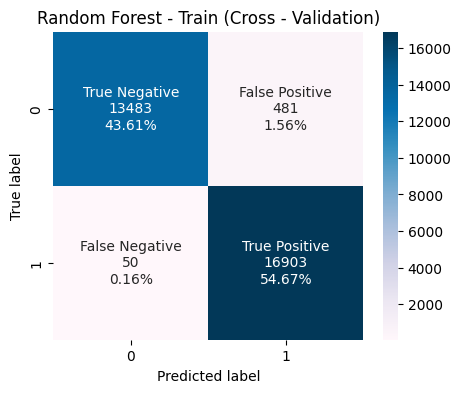

In [37]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train_ml, rf_cv.predict(X_train_ml), labels=rf_cv.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('Random Forest - Train (Cross - Validation)', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

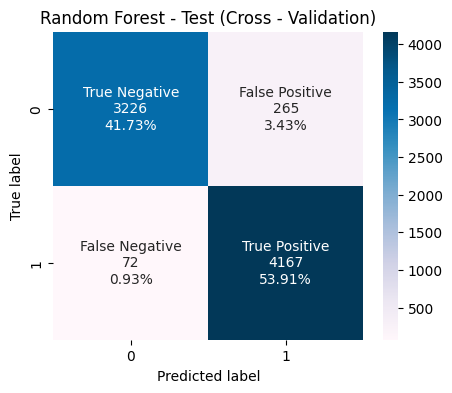

In [38]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_ml, rf_cv.predict(X_test_ml), labels=rf_cv.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('Random Forest - Test (Cross - Validation)', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

### <span style="font-family: Latin Modern Roman; font-size: 21px;"> 4.1. Classification Report </span>

In [39]:
print(
    classification_report(
        y_true = y_test_ml,
        y_pred = rf_cv.predict(X_test_ml)
    )
)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      3491
           1       0.94      0.98      0.96      4239

    accuracy                           0.96      7730
   macro avg       0.96      0.95      0.96      7730
weighted avg       0.96      0.96      0.96      7730



---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 5. XGBoost </span>

In [40]:
import xgboost as xgb

positive_instances = sum(y_train_ml == 1)
negative_instances = sum(y_train_ml == 0)
ratio = negative_instances / positive_instances

clf = xgb.XGBClassifier(
    objective = 'binary:logistic',
    scale_pos_weight = negative_instances/positive_instances
)
parameters = {
    "eta": [0.15, 0.2, 0.25],             
    "max_depth": [6, 7, 8],            
    "min_child_weight": [1, 2],        
    "gamma": [0.1, 0.2],             
    "colsample_bytree": [0.3, 0.5], 
    "n_estimators": [30, 50]          
}

grid = GridSearchCV(clf, parameters, n_jobs = 4, cv = 3)
grid.fit(X = X_train_ml, y = y_train_ml)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=4,
             param_grid={'colsample_bytree': [0.3, 0.5],
                         'eta': [0.15, 0.2, 0.25], 'gamma': [0.1, 0.2],
                         'max_depth': [6, 7, 8], 'min_child_weight': [1, 2],
                         'n_estimators': [30, 50]})

In [41]:
# Results
results = pd.DataFrame(grid.cv_results_)
results.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

,param_colsample_bytree,param_eta,param_gamma,param_max_depth,param_min_child_weight,param_n_estimators,mean_test_score,std_test_score
143,0.5,0.25,0.2,8,2,50,0.974804,0.000509
71,0.3,0.25,0.2,8,2,50,0.974674,0.000839
59,0.3,0.25,0.1,8,2,50,0.974642,0.001397
141,0.5,0.25,0.2,8,1,50,0.974157,0.000812
129,0.5,0.25,0.1,8,1,50,0.974027,0.000674
131,0.5,0.25,0.1,8,2,50,0.973671,0.000944
69,0.3,0.25,0.2,8,1,50,0.973671,0.000877
57,0.3,0.25,0.1,8,1,50,0.973607,0.000858
65,0.3,0.25,0.2,7,1,50,0.973380,0.000201
125,0.5,0.25,0.1,7,1,50,0.973251,0.000121


In [42]:
# Best hiperparameters using CV
print("---------------------------------------------------------------------")
print("Better Hyperparameters Found - XGBoosting (Cross - Validation)")
print("---------------------------------------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

---------------------------------------------------------------------
Better Hyperparameters Found - XGBoosting (Cross - Validation)
---------------------------------------------------------------------
{'colsample_bytree': 0.5, 'eta': 0.25, 'gamma': 0.2, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 50} : 0.9748035207558935 None


In [43]:
n_trees_included = len(grid.best_estimator_.get_booster().get_dump())
print(f"Number of Trees Included in the Model: {n_trees_included}")

Number of Trees Included in the Model: 50


In [44]:
xgb_model = grid.best_estimator_

In [45]:
# Save the model with pickle
with open('../models/xgboost_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

print("Model saved successfully with pickle!")

Model saved successfully with pickle!


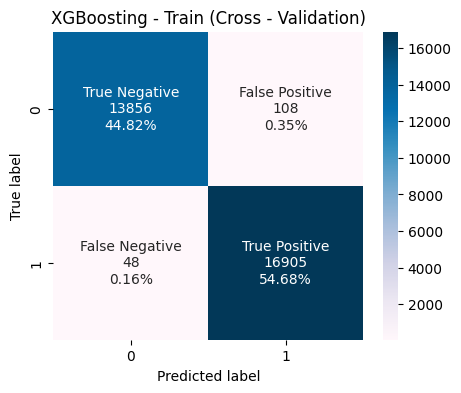

In [46]:
# Calculate the confusion matrix
cm = confusion_matrix(y_train_ml, xgb_model.predict(X_train_ml), labels=xgb_model.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('XGBoosting - Train (Cross - Validation)', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

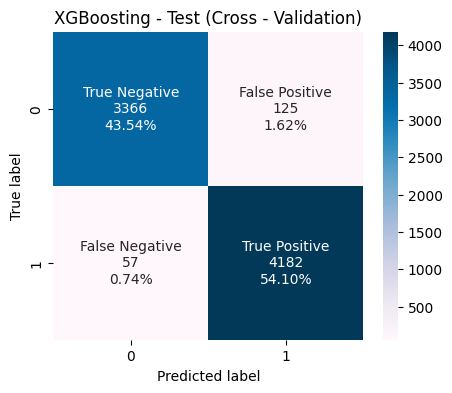

In [47]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_ml, xgb_model.predict(X_test_ml), labels=xgb_model.classes_)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('XGBoosting - Test (Cross - Validation)', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

### <span style="font-family: Latin Modern Roman; font-size: 21px;"> 5.1. Classification Report </span>

In [48]:
print(
    classification_report(
        y_true = y_test_ml,
        y_pred = xgb_model.predict(X_test_ml)
    )
)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3491
           1       0.97      0.99      0.98      4239

    accuracy                           0.98      7730
   macro avg       0.98      0.98      0.98      7730
weighted avg       0.98      0.98      0.98      7730



---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 6. LSTM </span>

In [49]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, LSTM, Dense,Input,GlobalMaxPooling1D,Dropout

# Model Parameters
maxlen = 150
embed_size = 100

input = Input(shape=(maxlen,))
learning_rate = 0.0001
x = Embedding(size + 1, embed_size)(input)
x = Dropout(0.5)(x)
x = LSTM(150,return_sequences=True)(x)
x = Dropout(0.5)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)

lstm_model = Model(input, x)

# Define optimizer with specified learning rate
optimizer = Adam(learning_rate = learning_rate)

lstm_model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

2025-01-07 14:40:08.483357: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2025-01-07 14:40:08.483395: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2025-01-07 14:40:08.483414: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2025-01-07 14:40:08.483690: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-07 14:40:08.484145: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [50]:
# Model Summary
lstm_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 100)          9005900   
                                                                 
 dropout (Dropout)           (None, 150, 100)          0         
                                                                 
 lstm (LSTM)                 (None, 150, 150)          150600    
                                                                 
 dropout_1 (Dropout)         (None, 150, 150)          0         
                                                                 
 global_max_pooling1d (Glob  (None, 150)               0         
 alMaxPooling1D)                                                 
                                                             

In [51]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_dl)
y_test_encoded = label_encoder.transform(y_test_dl)

In [52]:
import tensorflow as tf

y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)

In [53]:
# Train the Model
history = lstm_model.fit(X_train_dl, y_train_one_hot, epochs = 15, validation_data=(X_test_dl, y_test_one_hot))

Epoch 1/15


2025-01-07 14:40:18.791919: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-01-07 14:40:18.870985: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp_10.


967/967 [==============================] - 44s 45ms/step - loss: 0.3069 - accuracy: 0.8542 - val_loss: 0.1948 - val_accuracy: 0.9516
Epoch 2/15
967/967 [==============================] - 42s 43ms/step - loss: 0.1027 - accuracy: 0.9671 - val_loss: 0.1556 - val_accuracy: 0.9636
Epoch 3/15
967/967 [==============================] - 41s 42ms/step - loss: 0.0617 - accuracy: 0.9814 - val_loss: 0.1262 - val_accuracy: 0.9678
Epoch 4/15
967/967 [==============================] - 40s 41ms/step - loss: 0.0407 - accuracy: 0.9881 - val_loss: 0.1250 - val_accuracy: 0.9675
Epoch 5/15
967/967 [==============================] - 40s 41ms/step - loss: 0.0285 - accuracy: 0.9919 - val_loss: 0.0977 - val_accuracy: 0.9670
Epoch 6/15
967/967 [==============================] - 40s 42ms/step - loss: 0.0202 - accuracy: 0.9945 - val_loss: 0.0947 - val_accuracy: 0.9686
Epoch 7/15
967/967 [==============================] - 40s 42ms/step - loss: 0.0159 - accuracy: 0.9958 - val_loss: 0.0954 - val_accuracy: 0.9679
Epo

In [54]:
# Evaluate the model on the test data
loss, accuracy = lstm_model.evaluate(X_test_dl, y_test_one_hot)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

242/242 [==============================] - 5s 19ms/step - loss: 0.1216 - accuracy: 0.9625
Test Loss: 0.12160348892211914
Test Accuracy: 0.962483823299408


In [55]:
# Save the model with pickle
with open('../models/lstm_model.pkl', 'wb') as file:
    pickle.dump(lstm_model, file)

print("Model saved successfully with pickle!")

Model saved successfully with pickle!


967/967 [==============================] - 13s 13ms/step


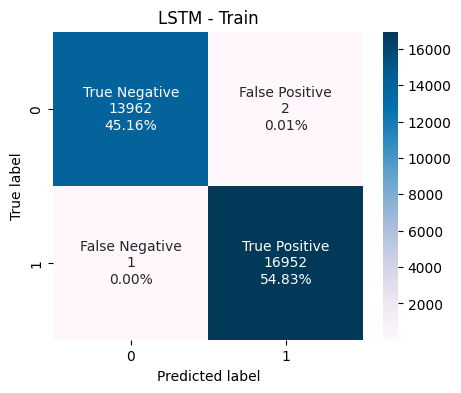

In [56]:
y_pred_probs = lstm_model.predict(X_train_dl)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_train_one_hot, axis=1)
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('LSTM - Train', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

242/242 [==============================] - 3s 13ms/step


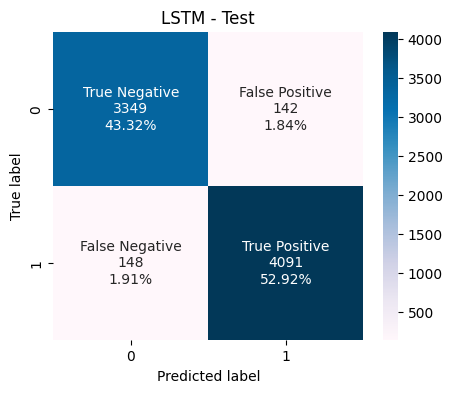

In [57]:
y_pred_probs = lstm_model.predict(X_test_dl)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('LSTM - Test', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 7. BERT </span>

In [58]:
from transformers import AutoTokenizer

bert_name = "bert-base-uncased"
bert_tokenizer = AutoTokenizer.from_pretrained(bert_name, padding = "max_length", do_lower_case = True)

# Save the tokenizer
bert_tokenizer.save_pretrained("../preprocessing_artifacts/bert_tokenizer")

('../preprocessing_artifacts/bert_tokenizer/tokenizer_config.json',
 '../preprocessing_artifacts/bert_tokenizer/special_tokens_map.json',
 '../preprocessing_artifacts/bert_tokenizer/vocab.txt',
 '../preprocessing_artifacts/bert_tokenizer/added_tokens.json',
 '../preprocessing_artifacts/bert_tokenizer/tokenizer.json')

In [59]:
X_tokenized_bert_train = bert_tokenizer(X_train_bert.tolist(), padding = True, truncation = True, return_tensors = "tf").input_ids
X_tokenized_bert_valid = bert_tokenizer(X_valid_bert.tolist(), padding = True, truncation = True, return_tensors = "tf").input_ids
X_tokenized_bert_test = bert_tokenizer(X_test_bert.tolist(), padding = True, truncation = True, return_tensors = "tf").input_ids

In [60]:
# Keep shuffling because it prevents the model from learning patterns based on the order of data
train_ds = tf.data.Dataset.from_tensor_slices((X_tokenized_bert_train, y_train_bert)).shuffle(len(X_train_bert)).batch(8).prefetch(tf.data.AUTOTUNE)
valid_ds = tf.data.Dataset.from_tensor_slices((X_tokenized_bert_valid, y_valid_bert)).shuffle(len(X_valid_bert)).batch(8).prefetch(tf.data.AUTOTUNE)

# Do not shuffle test set for evaluation, in order to compute the confusion matrix
test_ds = tf.data.Dataset.from_tensor_slices((X_tokenized_bert_test, y_test_bert)).batch(8).prefetch(tf.data.AUTOTUNE)

In [61]:
from transformers import TFAutoModelForSequenceClassification

bert_model = TFAutoModelForSequenceClassification.from_pretrained(bert_name, num_labels = 1)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [62]:
from transformers import AdamWeightDecay

bert_model.compile(
    optimizer = AdamWeightDecay(learning_rate = 2e-5, weight_decay_rate = 0.01),
    loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
    metrics = ["accuracy"]
)

In [63]:
model_history = bert_model.fit(
    train_ds,
    validation_data = valid_ds,
    epochs = 3,
    batch_size = 16
)

Epoch 1/3
3092/3092 [==============================] - 2464s 791ms/step - loss: 0.1180 - accuracy: 0.9518 - val_loss: 0.0280 - val_accuracy: 0.9914
Epoch 2/3
3092/3092 [==============================] - 2417s 781ms/step - loss: 0.0334 - accuracy: 0.9892 - val_loss: 0.0277 - val_accuracy: 0.9919
Epoch 3/3
3092/3092 [==============================] - 2448s 791ms/step - loss: 0.0319 - accuracy: 0.9904 - val_loss: 0.0363 - val_accuracy: 0.9892


In [64]:
bert_model.save("../models/bert_model")

INFO:tensorflow:Assets written to: ../models/bert_model/assets


INFO:tensorflow:Assets written to: ../models/bert_model/assets


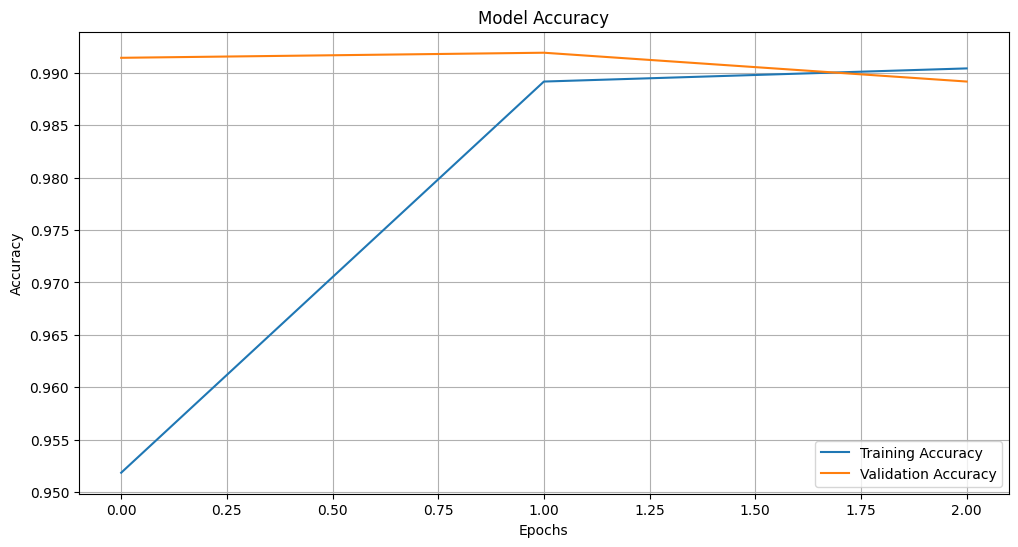

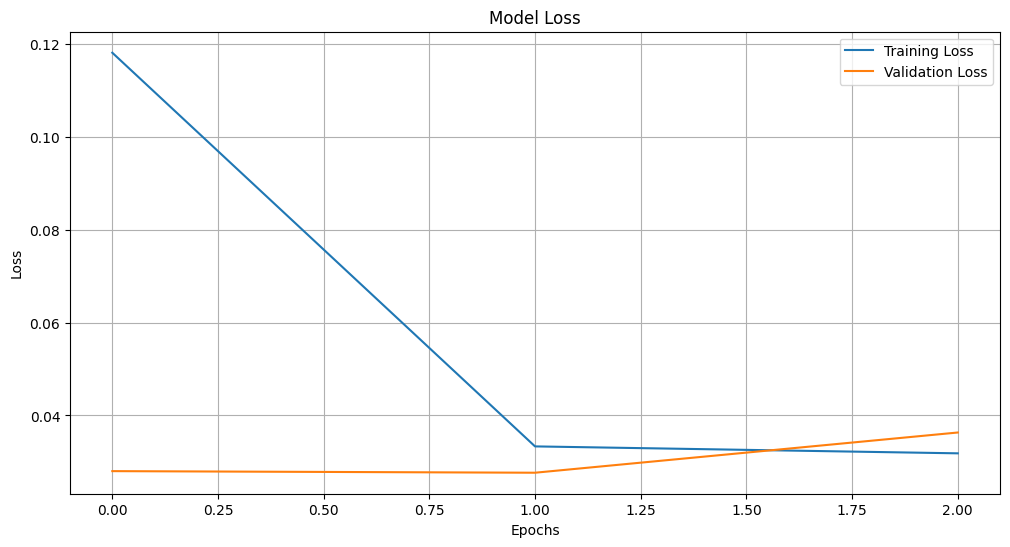

In [65]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [66]:
test_loss, test_acc = bert_model.evaluate(test_ds, verbose = 0)

print(f"Test Loss      : {test_loss}")
print(f"Test Accuracy  : {test_acc}")

Test Loss      : 0.041316915303468704
Test Accuracy  : 0.9877102375030518


967/967 [==============================] - 254s 263ms/step


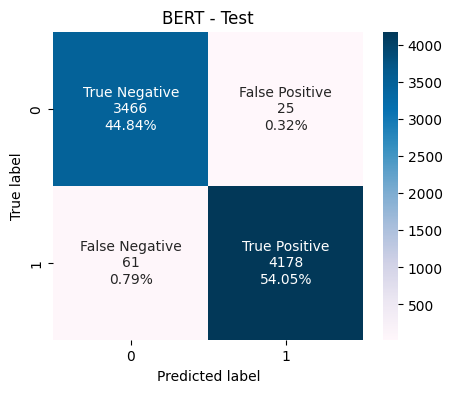

In [70]:
from scipy.special import expit as sigmoid

y_pred_logits = bert_model.predict(test_ds).logits
y_pred_probs = sigmoid(y_pred_logits)
y_pred_labels = np.round(y_pred_probs).astype(int).flatten()
y_true_labels = y_test_bert.flatten()

cm = confusion_matrix(y_true_labels, y_pred_labels)

# Define the group names and formats
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# Create the heatmap with custom labels
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm, annot=labels, fmt='', cmap='PuBu', ax=ax)
ax.set_title('BERT - Test', fontsize = 12)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> 8. Comparison </span>

In [71]:
import pickle
import tensorflow as tf
from tensorflow.keras.models import load_model
from transformers import AdamWeightDecay

# Load all models
with open('../models/dt_pruned_model.pkl', 'rb') as file:
    pruned_tree = pickle.load(file)
with open('../models/rf_cv_model.pkl', 'rb') as file:
    rf_cv = pickle.load(file)
with open('../models/xgboost_model.pkl', 'rb') as file:
    xgb_model = pickle.load(file)
with open('../models/lstm_model.pkl', 'rb') as file:
    lstm_model = pickle.load(file)

# Heavy BERT model
bert_model = load_model('../models/bert_model', custom_objects={'AdamWeightDecay': AdamWeightDecay})

In [72]:
from transformers import AutoTokenizer

# Load all tokenizers
with open('../preprocessing_artifacts/tfidf_vectorizer.pkl', 'rb') as file:
    vectorizer = pickle.load(file)
with open('../preprocessing_artifacts/lstm_tokenizer.pkl', 'rb') as file:
    lstm_tokenizer = pickle.load(file)

bert_tokenizer = AutoTokenizer.from_pretrained("../preprocessing_artifacts/bert_tokenizer")

In [100]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def predict_news(news_text):
    # Preprocess the input text
    tokens = clean_text(news_text)
    cleaned_text = ' '.join(tokens)

    # TF-IDF for ML models
    tfidf_features = vectorizer.transform([cleaned_text])
    
    # Tokenization and padding for LSTM
    max_sequence_length = 150
    lstm_sequence = lstm_tokenizer.texts_to_sequences([cleaned_text])
    lstm_padded = pad_sequences(lstm_sequence, maxlen = max_sequence_length)
    
    # Tokenization for Heavy BERT
    bert_inputs = bert_tokenizer(cleaned_text, return_tensors = 'tf', padding = "max_length", truncation = True, max_length = 512)   

    # Predict with ML models
    dt_pred = pruned_tree.predict_proba(tfidf_features)[0]
    rf_pred = rf_cv.predict_proba(tfidf_features)[0]
    xgb_pred = xgb_model.predict_proba(tfidf_features)[0]
    
    # Predict with LSTM
    lstm_pred_probs = lstm_model.predict(lstm_padded)[0]
    
    # Predict with Heavy BERT
    bert_predictions = bert_model.predict(dict(bert_inputs))
    bert_pred_logits = bert_predictions['logits'][0]
    bert_pred_probs = tf.nn.sigmoid(bert_pred_logits).numpy()
    
    # Format predictions as percentages
    predictions = {
        "Decision Tree": {"Fake": dt_pred[0] * 100, "True": dt_pred[1] * 100},
        "Random Forest": {"Fake": rf_pred[0] * 100, "True": rf_pred[1] * 100},
        "XGBoost": {"Fake": xgb_pred[0] * 100, "True": xgb_pred[1] * 100},
        "LSTM": {"Fake": lstm_pred_probs[0] * 100, "True": lstm_pred_probs[1] * 100},
        "BERT": {"Fake": (1 - bert_pred_probs[0]) * 100, "True": bert_pred_probs[0] * 100}
    }
    
    # Determine final classification based on True percentage
    predictions_class = {
        model: "True" if probs["True"] >= probs["Fake"] else "Fake" 
        for model, probs in predictions.items()
    }

    # Final decision based on majority vote
    final_decision = "True" if list(predictions_class.values()).count("True") > list(predictions_class.values()).count("Fake") else "Fake"
    
    # Convert predictions to a DataFrame
    predictions_df = pd.DataFrame(predictions).T.reset_index()
    predictions_df.columns = ["Model", "Fake (%)", "True (%)"]
    
    # Convert classifications to a DataFrame
    classifications_df = pd.DataFrame(list(predictions_class.items()), columns=["Model", "Classification"])
    
    return predictions_df, classifications_df, final_decision


In [101]:
fake_news_article = "Donald Trump lobbed a veiled threat at the former FBI director on Friday, hinting that some of their conversations before his firing may have been recorded. James Comey better hope that there are no  tapes  of our conversations before he starts leaking to the press!  the president tweeted.James Comey better hope that there are no 'tapes' of our conversations before he starts leaking to the press!  Donald J. Trump (@realDonaldTrump) May 12, 2017It s unclear whether Trump was warning that the White House is recording his calls, or if he believes the FBI may have been recording Comey s.Trump said Thursday during an interview with NBC News that the two men have spoken at least three times since Inauguration Day.Watch President Trump tell NBC s Lester Holt he was going to fire Comey anyway:And on those occasions, he insisted, Comey assured him that he was not personally the subject of any federal investigations. He said it once at dinner and then he said it twice during phone calls,  Trump said.He described a matter-of-fact exchange over dinner in which he asked an unusual question and got an unconventional response. I said,  If it s possible would you let me know, am I under investigation?  Trump recalled. He said,  You are not under investigation . It is rare for a federal law enforcement official to tell anyone, including the President of the United States, whether they are being investigated.Even if Comey doesn t speak to reporters about the circumstances behind his dismissal on Tuesday, he may have a high-profile venue to tell his side of the story.The Senate Intelligence Committee has asked him to testify next week.The latest twist from Trump amid reports that he demanded loyalty from James Comey during the private dinner at the White House back in January.The claims from associates of the now fired FBI director. Comey had told associates that he was summoned to the White House for a one-on-one dinner with Trump seven days after the inauguration, the New York Times reports.It was during the dinner that Trump reportedly asked Comey twice to pledge loyalty to him as the new Commander in Chief.Sources claim Comey declined to do so but said he told the President he would always be honest with him.Trump is said to have pressed Comey on whether that would be  honest loyalty , to which the FBI director said:  You will have that.  Sources close to Comey said he now believes this dinner conversation may have sealed his fate.This version of events is vastly different to the dinner conversation Trump himself described in an interview with NBC s Lester Holt on Thursday.The version is denied by the White House. But the president also used Twitter on Friday morning to say that  it is not possible for my surrogates to stand at podium with perfect accuracy .While it is not clear if they are talking about the same dinner, the pair are believed to have only dined together privately once.Trump indicated that he had dinner with Comey at the former FBI director s request   and said Comey was angling to keep his job. I had a dinner with him. He wanted to have dinner because he wanted to stay on. We had a very nice dinner at the White House,  Trump said. He asked for the dinner?  Holt followed up. A dinner was arranged, I think he asked for the dinner,  the president hedged.  And he wanted to stay on as the FBI head. And I said I ll consider and we ll see what happens. But we had a very nice dinner. And at that time he told me  you are not under investigation ,  Trump said.Trump said he had asked Comey   once over dinner and twice by phone   if the FBI were investigating him as part of its probe into alleged collusion between members of his campaign and the Russian government prior to the election.The President showed no concern that the request might be viewed as interference in the active FBI probe.Comey has not spoken publicly to confirm or challenge Trump s account.During that same interview, Trump declared he had planned to fire Comey all along, regardless of whether top Justice Department officials recommended the stunning step.The White House had initially cited a Justice Department memo criticizing Comey s handling of last year s investigation into Hillary Clinton s emails as the impetus for Trump s decision.For entire story-Daily Mail"
true_news_article = "U.S. President Donald Trump and South Korean President Moon Jae-in will hold talks on North Korea s nuclear crisis on Thursday amid tensions over whether Trump s harsh rhetoric against North Korean leader Kim Jong Un could lead to a miscalculation. U.S. officials scrambled to stress diplomatic options remained open after Trump used his U.N. General Assembly speech on Tuesday to threaten to  totally destroy  nuclear-armed North Korea and blast Kim as a  rocket man  on a suicide mission. Trump and Moon are to sit down at midday on the last day of Trump s four-day visit to New York, where he met with a flurry of foreign leaders gathered for the annual U.N. event. Trump will first meet Moon, then have lunch with Moon and Japanese Prime Minister Shinzo Abe, then meet separately with Abe. Publicly, the South Korean government described Trump s speech as an expression of how serious the United States views the North Korean nuclear challenge.  We view the speech as portraying a firm and specific stance on the key issues regarding keeping peace and safety that the international community and the United Nations are faced with,  Moon s office said in a statement on Wednesday. But two senior South Korean diplomats, interviewed by Reuters, expressed concern that Trump s rhetoric could provoke a miscalculation from Kim and prompt him to launch an attack. The diplomats also said the two governments are not communicating the same message, with South Korea saying it cannot afford another war on the Korean peninsula.  Any allies can t be on the exact same page on every matter but it s concerning that we are giving the impression that the two countries have different voices,  one diplomat said. A senior U.S. official dismissed the South Korean diplomats  worries about a miscalculation and said a cautious approach by past U.S. administrations had not stopped North Korea from developing nuclear weapons and ballistic missiles.  They re always worried about that,  the official said.  The cautious, go-slow approach of strategic patience has gotten us to where we are.  U.S. Secretary of State Rex Tillerson told reporters on Wednesday night that U.S.-led sanctions against North Korea are starting to take effect with the North experiencing fuel shortages. Trump and Moon are also at odds over trade. Trump has complained about the U.S. trade deficit with South Korea, but has so far been persuaded by his top advisers not to terminate a  U.S.-South Korean trade agreement as he has threatened. Moon, speaking at a business event in New York, urged greater U.S. investment in South Korea and defended the U.S.-South Korea trade agreement known as KORUS.  It is a fact that the Korea-U.S. FTA is an agreement that benefits both countries by expanding their trade, enhancing market accessibility and increasing their investment and jobs,  Yonhap quoted Moon as saying. It said he added that the U.S  trade deficit with South Korea was limited to products and was shrinking while South Korea continued to post large trade deficits with the United States in the service sector. "

In [102]:
predictions_df, classifications_df, final_decision = predict_news(fake_news_article)

print("Predictions Table:")
print(predictions_df)

print("\nClassifications Table:")
print(classifications_df)

print("\nFinal Decision:", final_decision)

1/1 [==============================] - 0s 368ms/step
Predictions Table:
           Model   Fake (%)   True (%)
0  Decision Tree  94.954026   5.045974
1  Random Forest  58.814278  41.185722
2        XGBoost  95.096177   4.903822
3           LSTM  99.878401   0.121596
4           BERT  99.939038   0.060962

Classifications Table:
           Model Classification
0  Decision Tree           Fake
1  Random Forest           Fake
2        XGBoost           Fake
3           LSTM           Fake
4           BERT           Fake

Final Decision: Fake


In [103]:
predictions_df, classifications_df, final_decision = predict_news(true_news_article)

print("Predictions Table:")
print(predictions_df)

print("\nClassifications Table:")
print(classifications_df)

print("\nFinal Decision:", final_decision)

1/1 [==============================] - 0s 157ms/step
Predictions Table:
           Model  Fake (%)   True (%)
0  Decision Tree  3.714260  96.285740
1  Random Forest  9.617685  90.382315
2        XGBoost  0.079048  99.920952
3           LSTM  0.056327  99.943668
4           BERT  0.126094  99.873906

Classifications Table:
           Model Classification
0  Decision Tree           True
1  Random Forest           True
2        XGBoost           True
3           LSTM           True
4           BERT           True

Final Decision: True


In [104]:
fake_news_article = "First Lady Melania Trump hosted military moms at the White House on Friday. She gave a heartwarming and heartfelt speech about what it means to be a mother. She s beautiful inside and out!Notice how President Trump looks on lovingly and proudly. The First Lady speaks with empathy about how hard it must be for them to send their military son or daughter to fight for America: Thank you for all that you do, for your selflessness and for your own sacrifice on behalf of our country    First Lady Melania TrumpShe does a great job!THE DEPARTMENT OF DEFENSE: In honor of Mother s Day, President Donald J. Trump and First Lady Melania Trump welcomed active-duty troops, their spouses and mothers to the White House, today. As commander in chief of the United States, my supreme duty is to protect our citizens and that means supporting our servicemen and women,  the president said.  That obligation begins the first day they put on the uniform and continues every day after, when they return to civilian life as veterans. Trump said he would make sure the nation always takes care of its soldiers, sailors, airmen, Marines and the members of the Coast Guard. To every military service member, mother and spouse here today, I want you to know you have my complete and total support   [and] the White House, this administration and this government stands fully behind you,  the president said.Moms Are Heroes, Too As we celebrate Mother s Day this weekend, this is one of many opportunities for us to thank the incredible military mothers who love and care for our nation s heroes,  Trump said. The mothers are heroes, too. It is your sacrifice that protects our nation, safeguards our liberties and makes sure our beautiful American flag always waves proudly above our very glorious land,  he said to the military mothers in the audience.The president introduced First Lady Melania Trump, who said she was honored by the military members  presence as the nation celebrates National Military Appreciation Month and Mother s Day.Title That Claims The Heart As everyone in this room knows, mother is a title that claims your heart and changes your life forever,  the first lady said.  In fact, it has been said that having a child means allowing your heart to walk around outside of your body. For the mothers of someone who has, or is, serving our country, this must be especially true. Noting that while she, too, is a mother, Melania Trump said she does not know of the many different challenges that come with being the parent of a service member.Part Of A Community While you stand with many other parents, so strong and so proud, I am sure that you sometimes march on this journey alone,  the first lady said, adding,  While your sons and daughters are away serving so selflessly, having a community share even some of that burden must make all the difference in the world. Melania Trump told the mothers in the audience they are part of a community, and the White House is proud to be a part of it with them. Thank you for all that you do, for your selflessness and for your own sacrifice on behalf of our country,  she said. Let today s celebration with this community of strong and selfless moms be a first step in building relationships,  the first lady said,  and in your knowing, that my husband and I, along with   everyone here at the White House, hold you close in our hearts and thoughts each and every day. "
true_news_article = "The United States said on Wednesday it is weighing whether the Iranian nuclear deal serves its security interests even as Iran said it did not expect Washington to abandon the agreement. A collapse of the 2015 deal, which U.S. President Donald Trump has called  an embarrassment  but which is supported by the other major powers that negotiated it with Iran, could trigger a regional arms race and worsen Middle East tensions.     Iranian President Hassan Rouhani vowed that his country would not be the first to violate the agreement under which Tehran agreed to restrict its nuclear program in return for the loosening of economic sanctions that had crippled its economy.  We don t think Trump will walk out of the deal despite (his) rhetoric and propaganda,  Rouhani told reporters on the sidelines of the U.N. General Assembly gathering of world leaders. He also ruled out the idea of renegotiating the pact. Trump told reporters he had made a decision on what to do about the agreement but would not say what he had decided. Matters were no clearer after Iran and the world powers that negotiated the deal - Britain, China, France, Germany, Russia and the United States - met for talks that a European source said included a long discussion between the U.S. and Iranian foreign ministers. It was the first time that the two men, U.S. Secretary of State Rex Tillerson and Iranian Foreign Minister Mohammad Javad Zarif, had met since Trump took office on Jan. 20. The EU s foreign policy chief, Federica Mogherini, said all sides believed there had been no violations to the deal but she was unable to say after the roughly hour and 20-minute meeting whether the United States would stick to it.  We already have one potential nuclear crisis. We definitely (do) not need to go into a second one,  she told reporters, alluding to North Korea s pursuit atomic weapons. Asked if the United States had committed to staying in the pact, she appeared to be at a loss and said:  Another question.      Tillerson told reporters Trump did not wish to leave the Iran nuclear issue to the next president.  That is the reason he is very, very carefully considering the decision of whether we find the JCPOA to continue to serve the security interests of the American people or not,  he said, referring to the pact formally called the Joint Comprehensive Plan of Action. The U.S. president, who on Tuesday called the deal  one of the worst and most one-sided transactions the United States has ever entered into,  told reporters he had made up his mind whether to keep the pact but declined to disclose his decision. Trump must decide by Oct. 15 whether to certify that Iran is complying with the pact, a decision that could sink the deal. If he does not, the U.S. Congress has 60 days to decide whether to reimpose sanctions waived under the accord. A senior U.S. official said Trump is leaning toward not certifying that Iran is complying with the pact and letting Congress effectively decide whether to kill the agreement. The official said Trump could always change his mind before the deadline and noted he publicly and privately has fumed about the deal, feeling the United States was taken advantage of. A source familiar with the U.S. discussions said the Trump administration is also considering ways to leave the agreement intact, sanction Iran for its missile tests and support for extremist groups, and then seek to strengthen the pact. The prospect of Washington reneging on the agreement has worried some U.S. partners that helped negotiate it, especially as the world grapples with North Korea s nuclear and ballistic missile development. French President Emmanuel Macron told reporters it would be a mistake to pull out of the pact. However, he also appeared to open the door for tougher action on Iran, saying the deal was insufficient given Iran s growing regional influence since 2015.  Is this agreement enough? No. It is not, given the evolution of the regional situation and increasing pressure that Iran is exerting on the region, and given ... increased activity by Iran on the ballistic level since the accord,  he said. Chinese Foreign Minister Wang Yi said the recent tension on the Korean peninsula underlined the importance of the Iranian deal, and that China would continue to support and safeguard it, Chinese state media said. An official from a Gulf nation suggested that his country could accept the deal s collapse. Should Trump either not certify Iranian compliance or withdraw from the deal entirely, the Gulf official said:  I think we can live with that."

In [105]:
predictions_df, classifications_df, final_decision = predict_news(fake_news_article)

print("Predictions Table:")
print(predictions_df)

print("\nClassifications Table:")
print(classifications_df)

print("\nFinal Decision:", final_decision)

1/1 [==============================] - 0s 163ms/step
Predictions Table:
           Model   Fake (%)   True (%)
0  Decision Tree   5.392412  94.607588
1  Random Forest  62.862588  37.137412
2        XGBoost  43.564862  56.435138
3           LSTM  99.031538   0.968459
4           BERT  41.335356  58.664644

Classifications Table:
           Model Classification
0  Decision Tree           True
1  Random Forest           Fake
2        XGBoost           True
3           LSTM           Fake
4           BERT           True

Final Decision: True


In [106]:
predictions_df, classifications_df, final_decision = predict_news(true_news_article)

print("Predictions Table:")
print(predictions_df)

print("\nClassifications Table:")
print(classifications_df)

print("\nFinal Decision:", final_decision)

1/1 [==============================] - 0s 148ms/step
Predictions Table:
           Model  Fake (%)   True (%)
0  Decision Tree  3.714260  96.285740
1  Random Forest  9.894515  90.105485
2        XGBoost  0.264668  99.735332
3           LSTM  0.714895  99.285102
4           BERT  0.139791  99.860209

Classifications Table:
           Model Classification
0  Decision Tree           True
1  Random Forest           True
2        XGBoost           True
3           LSTM           True
4           BERT           True

Final Decision: True


In [107]:
fake_news_article="After taking office, Donald Trump has repeatedly taken credit for President Obama s economy and regularly touts jobs numbers on his Twitter timeline. Now that Trump s economy is in effect, we doubt he ll be tweeting about the labor market losing 33,000 jobs last month.While some of this can be attributed to natural disasters, Trump has also failed to pass any major legislation.Job growth in August and July was revised down, to 38,000 less than previously reported. Economists expected 75,000 new jobs instead of a 33,000 job loss.The economy has added an average of 172,000 jobs a month over the past year but that has dropped to a 91,000 average over the past three months, showing a trend which is not in Trump s favor.Axios reports:Economists widely blame the disruptive effects of Hurricanes Irma and Harvey for the disappointing number, because the survey methodology dictates that folks who didn t get paid on the pay period that included September 12th are not counted as employed.But the report also revised down the two previous monthly estimates of job growth, suggested the slowdown is not all weather related.After Obama took office, he had quite a task on his hands in dealing with the cost of his predecessor s wars, but he did it. Obama s economy took an upward swing, even after natural disasters such as Hurricane Sandy and the floods which ravaged Louisiana. Throughout his campaign, Trump called Obama s economy  a disaster  but compared to other presidents, that was far from the truth.Fact: Obama took office during the worst recession since the Great Depression when the economy was losing 750,000 jobs a month and already had lost a record 9 percent of GDP. Obama started with a weak economy due to his predecessor s decisions but his final jobs report showed 75 consecutive months of growth.The unemployment rate, however, just fell to 4.2 percent, and we re sure Trump will bring that up. Let s see how long that lasts because the former reality show star is now making war noises toward North Korea. Also, if Trump manages to get the GOP tax proposal in the works, we ll see more reports like this one.But for a guy whose  presidency  has been based on undoing everything Obama has done, he sure did a good job of that with the first loss of jobs reported in 7 years.Photo: Alex Wong via Getty Images."
true_news_article = "Barring an upset, the main uncertainty surrounding Europe s most important election this year is not whether Angela Merkel will continue to lead Germany after this weekend s vote, but who with and how long they will take to get going. Although a surprise cannot be ruled out in the wake of any Russian interference, pollsters say they are confident about their surveys, which show Merkel s conservatives winning the most seats in the Bundestag lower house. The far-right, anti-immigrant Alternative for Germany (AfD) is set to enter parliament for the first time, and some experts have said it may gain more support than the roughly 10 percent  polls suggest, an alarming prospect for many at home and abroad. But all the other parties have ruled out joining it in a coalition - an inherent part of Germany s electoral system -  and the most likely scenario is probably a repeat of Merkel s  grand coalition  with the Social Democrats (SPD). She will start sounding out partners right after the Sept. 24 vote, but coalition building is a protracted process, which could paralyze policy for months at a time when Brexit has shaken Europe s foundations. The process is especially complex this time as the number of parliamentary groups could rise to six from four. Informal soundings and then exploratory talks precede formal coalition negotiations and party leaders may also seek approval from their members before signing off on any deal. Depending on the shape of the coalition, the main issues at stake are the integration of the more than 1 million migrants who have arrived in Germany in the last two years, and investment in Europe s biggest economy as well as Merkel s leading role in talks on reform of the European Union and relations with Russia and Turkey. Here are the main scenarios: CONSERVATIVES, SOCIAL DEMOCRATS ( GRAND COALITION ) The most likely option, according to opinion polls. Merkel s parliamentary party, made up of her Christian Democrats (CDU) and the Bavarian Christian Social Union (CSU) has governed with the SPD for eight of the 12 years that Merkel has been chancellor, including the last four. WHAT MAKES IT POSSIBLE: Merkel, who has steered the conservatives towards the political center ground, looks comfortable ruling with the SPD. Such a coalition would likely have a large majority, provide continuity and broadly agree on Europe, Turkey, foreign policy, migration and security issues. HURDLES: It is a last resort for both sides, especially the SPD, which fears it will lose out as junior partner. It wants more emphasis on investment, education, tackling inequality and fair pensions while conservatives are more focused on tax cuts. The SPD is also reluctant to back planned defense spending hikes.  CONSERVATIVES, FREE DEMOCRATS ( BLACK-YELLOW ) The conservative block and pro-business Free Democrats (FDP) are traditional partners, especially on financial and economic policy, having ruled together for almost half of post-war Germany s seven decades. If they win sufficient votes, this is the most likely scenario. WHAT MAKES IT POSSIBLE: The pro-business FDP has rebounded this year, winning enough votes in a vote in Germany s most populous state, North Rhine-Westphalia, in May to share power with the CDU there. A repeat at federal level would herald tax cuts and deregulation and possibly tighter laws on immigration, asylum seeking and security. HURDLES: The FDP was wiped out of parliament in 2013 after four chaotic years ruling with Merkel. It has more radical tax reduction and privatization plans, opposes deeper EU integration and wants EU countries to be able to quit the euro zone. Party leader Christian Lindner has also suggested Germany accept Russia s 2014 annexation of Crimea from Ukraine, something Merkel has ruled out. CONSERVATIVES, FDP, GREENS ( JAMAICA  - REFERENCE TO PARTIES  COLORS: BLACK, YELLOW, GREEN) As yet untested at a federal level, this combination rules in the northern state of Schleswig-Holstein. WHAT MAKES IT POSSIBLE - If Merkel s bloc can t form an alliance with the FDP or the Greens alone, it may try a three-way deal. Both smaller parties have played down this option but may be lured by the prospect of power.  HURDLES - The Greens and FDP are at opposite ends of the political spectrum. Policy clashes would be likely on tax, energy, the EU and migrants. CONSERVATIVES, GREENS ( BLACK-GREEN ) Untested at a federal level, this has been mooted as an option under Merkel, who has pushed renewable energy. The CDU and Greens have worked together at regional level, including in a Greens-led coalition in the rich southern state of Baden-Wuerttemberg. WHAT MAKES IT POSSIBLE: The Greens  leaders are pragmatic, worlds away from the eco-warriors who founded the party. The prospect of power may persuade them to compromise. Such a coalition would promote a strong Europe and focus on fighting climate change. The Greens would push for a phaseout of coal-fired power stations.  HURDLES: Doubtful they would win a majority. Conservatives want lower taxes while Greens want to tax the super rich. Greens have a more liberal migrant policy which could pit them against the CSU, and they oppose plans to increase defense spending. Clashes are also likely on some aspects of energy policy and auto emissions regulation following the diesel scandal. A minority government would be a first and stability-craving Germans would not like it but may prefer it to new elections. WHAT MAKES IT POSSIBLE: If Merkel fails to find a partner, she may feel she has a mandate to rule given her personal popularity. She would probably get support for individual policies from the FDP, SPD and Greens.  HURDLES: Merkel s natural caution coupled with Germans  fear of instability, a legacy of the fragmentation in the years that preceded the rise of Hitler s Nazi party.  SPD, LEFT, GREENS ( RED-RED-GREEN  or  R2G ) Highly unlikely. Never tested at a federal level, a tie up between the SPD and Greens, preferred partners, and the radical Left party, could be the only way for the SPD to take the chancellery. It is being tested in the state of Berlin under SPD leadership and, with a Left premier, in the state of Thuringia. WHAT MAKES IT POSSIBLE: For the first time, the SPD has not excluded the possibility of joining the Left. Such a coalition would probably focus on boosting investment and tackling inequality and adopt a more Russia-friendly stance. HURDLES: The Left s links with Communists in former East Germany and painful SPD memories of an exodus to the Left over deep labor market reforms more than a decade ago. While the SPD and Greens could rule together relatively easily, the Left wants a top tax rate of 75 percent, a 30-hour week and to replace NATO with an alliance including Russia. For an interactive on German elections, click: tmsnrt.rs/2fv8Yqv"

In [108]:
predictions_df, classifications_df, final_decision = predict_news(fake_news_article)

print("Predictions Table:")
print(predictions_df)

print("\nClassifications Table:")
print(classifications_df)

print("\nFinal Decision:", final_decision)

1/1 [==============================] - 0s 150ms/step
Predictions Table:
           Model   Fake (%)   True (%)
0  Decision Tree  99.697454   0.302546
1  Random Forest  77.453328  22.546672
2        XGBoost  99.216777   0.783222
3           LSTM  99.999964   0.000037
4           BERT  99.939769   0.060231

Classifications Table:
           Model Classification
0  Decision Tree           Fake
1  Random Forest           Fake
2        XGBoost           Fake
3           LSTM           Fake
4           BERT           Fake

Final Decision: Fake


In [109]:
predictions_df, classifications_df, final_decision = predict_news(true_news_article)

print("Predictions Table:")
print(predictions_df)

print("\nClassifications Table:")
print(classifications_df)

print("\nFinal Decision:", final_decision)

1/1 [==============================] - 0s 150ms/step
Predictions Table:
           Model   Fake (%)    True (%)
0  Decision Tree   0.000000  100.000000
1  Random Forest  18.216125   81.783875
2        XGBoost   2.958286   97.041714
3           LSTM   1.709409   98.290598
4           BERT   0.160033   99.839967

Classifications Table:
           Model Classification
0  Decision Tree           True
1  Random Forest           True
2        XGBoost           True
3           LSTM           True
4           BERT           True

Final Decision: True


In [110]:
fake_news_article = "Donald Trump doesn t exactly hide the fact that he s a sociopath. Just looking at the most recent events this country has faced, we ve witnessed the President of the United States turn his back on human suffering and be completely indifferent to those in need. As we saw with the hurricane that ravaged Puerto Rico and the Las Vegas massacre, Trump is constantly missing in action and spending more time on Twitter than actually doing his job. That s why the latest move by Trump and his campaign shouldn t surprise anyone, even though it s downright heartless.On Saturday, Trump s campaign sent out a fundraising email that was so disgusting, it immediately drew attention on Twitter. In the email, Trump exploited the mass shooting in Las Vegas to raise funds for his pathetic re-election campaign. In the Trump-Pence Weekly Newsletter, the Trump campaign spoke to potential donors and supporters of Trump, mentioning Trump s recent visit to Las Vegas. The emails said: Our nation is still in shock and mourning following the massacre of 58 concertgoers and hundreds of others injured in Las Vegas. Then, the email states that Trump and First Lady Melania had spoken to victims and given credit to first responders. We know that your sorrow feels endless. We stand together to help you carry your pain. You can catch a glimpse of the horrific email below:Unreal: the Trump campaign just sent an email using the Las Vegas shooting to fundraise for the campaign. pic.twitter.com/MWYu0Sa3VF  Matt McDermott (@mattmfm) October 7, 2017Trump has been doing fundraiser after fundraiser in preparation for his re-election campaign, which is somewhat hilarious considering that his approval rating just hit a new historic low. One thing is for sure, though   if Trump wants to appeal to the American people, he might want to stop exploiting tragedies for his personal gain.Featured image via Win McNamee / Getty Images"
true_news_article = "U.S. Air Force B-1B Lancer bombers escorted by fighter jets flew in international airspace over waters east of North Korea on Saturday, in a show of force the Pentagon said demonstrated the range of military options available to President Donald Trump. The flight, which was disclosed shortly before North Korea s foreign minister was due to address the United Nations, was the farthest north of the demilitarized zone separating North and South Korea that any U.S. fighter jet or bomber has flown in the 21st century, the Pentagon said.  This mission is a demonstration of U.S. resolve and a clear message that the President has many military options to defeat any threat,  said Pentagon spokeswoman Dana White, calling   North Korea s weapons program  a grave threat.   We are prepared to use the full range of military capabilities to defend the U.S. homeland and our allies.  The flight follows a week of heightened rhetoric from Washington and Pyongyang, with Trump and Kim Jong Un trading  insults. Trump called the North Korean leader a  madman  on Friday, a day after Kim dubbed him a  mentally deranged U.S. dotard.  Pyongyang conducted its sixth and largest nuclear test on Sept. 3 and has launched dozens of missiles this year as it accelerates a program aimed at enabling it to target the United States with a nuclear-tipped missile. The North has threatened to test a hydrogen bomb over the Pacific. The Pentagon said the B-1B Lancer bombers came from Guam and the U.S. Air Force F-15C Eagle fighter escorts came from Okinawa, Japan. It said the operation showed the seriousness with which it took North Korea s  reckless behavior."

In [111]:
predictions_df, classifications_df, final_decision = predict_news(fake_news_article)

print("Predictions Table:")
print(predictions_df)

print("\nClassifications Table:")
print(classifications_df)

print("\nFinal Decision:", final_decision)

1/1 [==============================] - 0s 146ms/step
Predictions Table:
           Model    Fake (%)      True (%)
0  Decision Tree   99.697454  3.025463e-01
1  Random Forest   85.622960  1.437704e+01
2        XGBoost   99.957633  4.236815e-02
3           LSTM  100.000000  4.607921e-09
4           BERT   99.939491  6.050884e-02

Classifications Table:
           Model Classification
0  Decision Tree           Fake
1  Random Forest           Fake
2        XGBoost           Fake
3           LSTM           Fake
4           BERT           Fake

Final Decision: Fake


In [112]:
predictions_df, classifications_df, final_decision = predict_news(true_news_article)

print("Predictions Table:")
print(predictions_df)

print("\nClassifications Table:")
print(classifications_df)

print("\nFinal Decision:", final_decision)

1/1 [==============================] - 0s 162ms/step
Predictions Table:
           Model   Fake (%)   True (%)
0  Decision Tree   3.714260  96.285740
1  Random Forest  18.852556  81.147444
2        XGBoost   0.272971  99.727029
3           LSTM   0.318503  99.681503
4           BERT   0.176561  99.823439

Classifications Table:
           Model Classification
0  Decision Tree           True
1  Random Forest           True
2        XGBoost           True
3           LSTM           True
4           BERT           True

Final Decision: True
